# Data Visualization: Pandas + Seaborn

Today is the last lesson for the data science unit, and we will be doing **data visualization!** Data visualization is all about **communicating** things about the data. For example, data visualization can:
* Tell a story
* Make a comparison between things
* Show relationships or patterns
* Show changes over time


Today's lesson will be using a library called [seaborn](https://seaborn.pydata.org/) with pandas to make graphs. Seaborn is **very** flexible, so it is worth browsing the documentation to come up with ideas for lots of beautiful graphs you can make. 



## Setup

First we'll import pandas and seaborn. Usually, we import seaborn as `sns`

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

/Users/paul/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


We also do 2 more things:
* `import matplotlib.pyplot as plt` -- this is another plotting software that seaborn is built on. We'll need it when we save our plots at the end ([docs](https://matplotlib.org/))
* run this command `%matplotlib inline` to ensure that our plots all show up in our jupyter notebooks 

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

### Loading in 2017 census data

For today's lesson we'll use data from the 2017 census. Let's load it in and explore the columns.
* Each row describes **one county**

In [3]:
df = pd.read_csv('../../datasets/census.csv')
df.head(4)

,FIPS,Geography,population,median_age,total_households,median_household_income,avg_household_size,total_families,avg_family_size,pct_owner_occupied_units,pop_16_years_or_older,unemployment_pct,population_group
0,10100,"Aberdeen, SD Micro Area",42608,37.8,17907,54533,2.29,11172,2.89,67.5,33671,1.8,Low Population
1,10140,"Aberdeen, WA Micro Area",71454,43.5,28070,45483,2.44,17782,3.00,66.1,58156,10.1,Low Population
2,10180,"Abilene, TX Metro Area",169000,33.9,60369,48156,2.57,39949,3.12,62.4,133221,4.4,Low Population
3,10220,"Ada, OK Micro Area",38289,35.5,14512,46689,2.54,9459,3.07,64.0,30079,5.1,Low Population


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   FIPS                      917 non-null    int64  
 1   Geography                 917 non-null    object 
 2   population                917 non-null    int64  
 3   median_age                917 non-null    float64
 4   total_households          917 non-null    int64  
 5   median_household_income   917 non-null    int64  
 6   avg_household_size        917 non-null    float64
 7   total_families            917 non-null    int64  
 8   avg_family_size           917 non-null    float64
 9   pct_owner_occupied_units  917 non-null    float64
 10  pop_16_years_or_older     917 non-null    int64  
 11  unemployment_pct          917 non-null    float64
 12  population_group          917 non-null    object 
dtypes: float64(5), int64(6), object(2)
memory usage: 93.3+ KB


# Continuous vs. Categorical

Before we make any graphs, it is important to know when a variable is **continuous vs. categorical** (check out [this resource](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/what-are-categorical-discrete-and-continuous-variables/#:~:text=Categorical%20variables%20contain%20a%20finite,not%20have%20a%20logical%20order.&text=Continuous%20variables%20are%20numeric%20variables,be%20numeric%20or%20date%2Ftime.)) We won't spend a ton of time on this but:
* Continuous variables are ones that exist on a continuum (like a spectrum). 
    * For example, age (years) or height (inches). 
    * Continuous variables are usually **int** or **float** data types
* Categorical variables are ones that can only fall into certain categories. 
    * For example, state ('New York', 'California', etc) or political party ('Democrat', 'Republican', 'Independent') 
    * Categorical variables are usually **strings**, although a categorical variable with only 2 possibilieis (i.e. 'tumor' vs' no tumor') could be a **boolean**

# Histograms

Histograms are a great way to see how a **continuous** variable is distribued. Let's try it out with the `sns.distplot()` function:

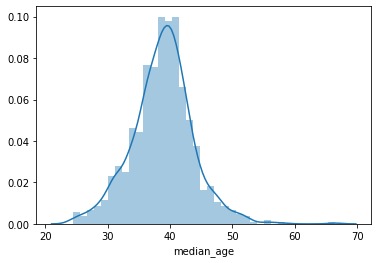

In [5]:
sns.distplot(df['median_age'])

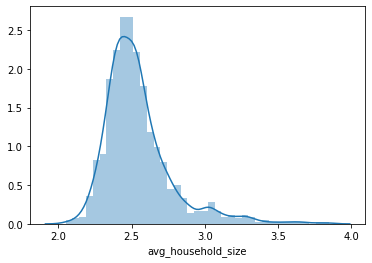

In [6]:
sns.distplot(df['avg_household_size'])

# Categorical plots

Now, let's say we want to do the equivalent, but a variable is categorical? What can we do?

We can use something called `sns.catplot()` for this, or a 'categorical plot'. Here, we can compare and see how many counties there were in each population group:

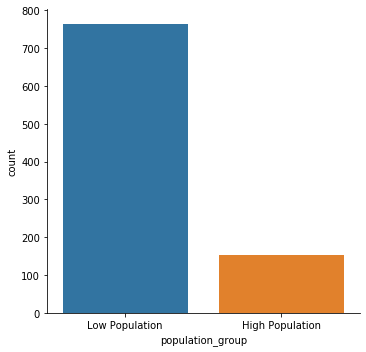

In [7]:
sns.catplot(x="population_group", kind="count", data=df)

So, here we can see that there are many more counties in the 'High Population' group compared to the 'Low Population' one

# Scatter plots

Now, it can be helpful to know the relationship between **multiple** variables. If both are continuous, a scatterplot is a great way to do this. We can use `sns.scatterplot()`

* Notice that now we have to define the `data`, `x`, and `y` parameters to specify where each piece of the graph goes

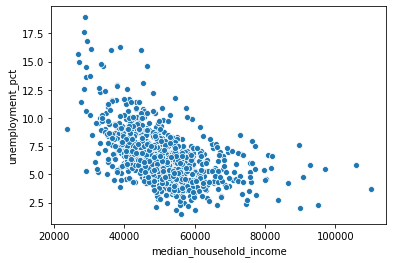

In [8]:
sns.scatterplot(data = df, x = 'median_household_income', y = 'unemployment_pct')

### Scatterplot + line of best fit

We aren't going to talk about the stats behind this much, but it can be really helpful to add a line visualizing the best fit of a **linear relationship** between two continuous variables. We can do this by using the same syntax as a scatterplot, but using `sns.lmplot()` instead (the lm stands for 'linear model'). Check out the [docs here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)

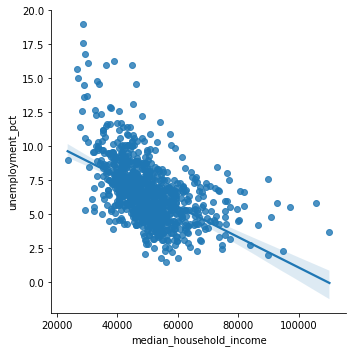

In [9]:
sns.lmplot(data = df, x = 'median_household_income', y = 'unemployment_pct')

# Scatterplot + groups

We can break up the scatterplot into different colors by groups too, using the `hue` argument

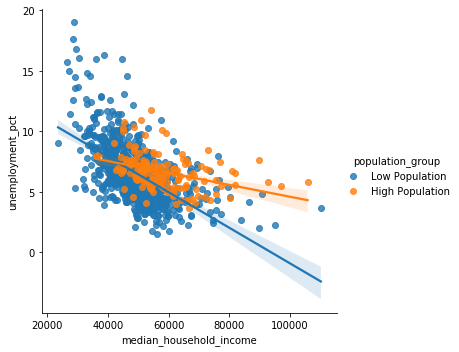

In [10]:
sns.lmplot(data = df, x = 'median_household_income', y = 'unemployment_pct', hue = 'population_group')

# Comparing categories

What if we want to compare different groups (categorical variable) to each other? Seaborn lets us do that too in a few different ways, with the categorical variable on the x-axis and a continuous one on the y axis

## Barplots

We can do these with `sns.barplot()`. Again, we specify, `data`, `x`, and `y`, only x is categorical now.
* So, here we compare the median household income in counties with low vs. high population

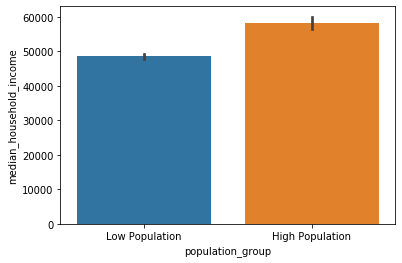

In [12]:
sns.barplot(data = df, x = 'population_group', y = 'median_household_income')

What is the barplot showing exactly? Well, the **height** of the bar is, by default, the **average** household income in each group, and the little lines show the [standard error](https://en.wikipedia.org/wiki/Standard_error), or a measure of how certain we are about that average. 

## Boxplots

Boxplots are very similar in syntax to bar graphs, but they show the data a little differently. The inside box shows the 25% quantile, the median (50% quantile), and the 75% quantile. So, we can think about this as showing the box where **half** the data points fall. The points show outliers

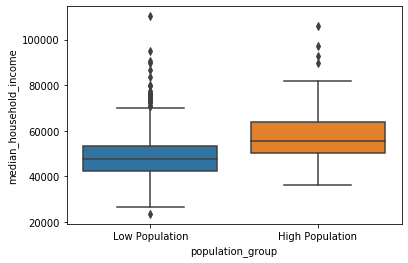

In [13]:
sns.boxplot(data = df, x = 'population_group', y = 'median_household_income')

We can also get rid of the outlier points on the graph by setting `fliersize=0`

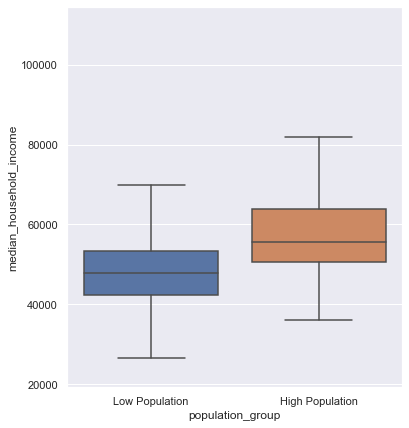

In [32]:
sns.boxplot(data = df, x = 'population_group', y = 'median_household_income', fliersize=0)

# Changing figure size

We can resize a figure with the following code -- the two numbers are `(width, height)`.

This is REALLY helpful for when we are saving figures out to files

In [23]:
sns.set(rc={'figure.figsize':(10,6)})

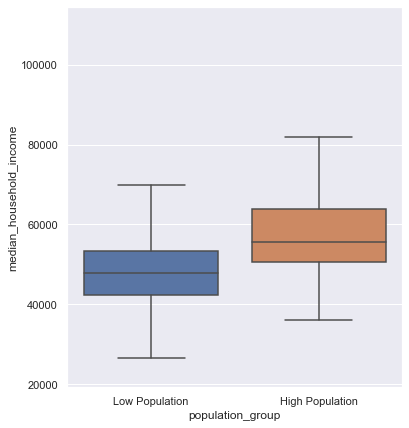

In [33]:
sns.boxplot(data = df, x = 'population_group', y = 'median_household_income', fliersize=0)

Another example

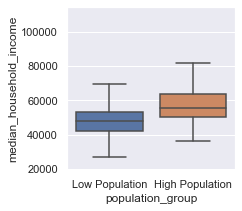

In [34]:
sns.set(rc={'figure.figsize':(3,3)})
sns.boxplot(data = df, x = 'population_group', y = 'median_household_income', fliersize=0)

# Labels

It is always good to give our graphs clear labels so we can communicate the point effectively! 

So, let's relabel the x and y axes, and give it a title to make it more clear

To do this, we want to do 2 things:
1. Assign the plot to a variable
2. Use the `.set()` method to set `xlabel`, `ylabel`, and `title` as strings with that variable

[Text(0, 0.5, 'Unemployment %'),
 Text(0.5, 0, 'County Size'),
 Text(0.5, 1.0, 'Median income ($) in small vs. large counties')]

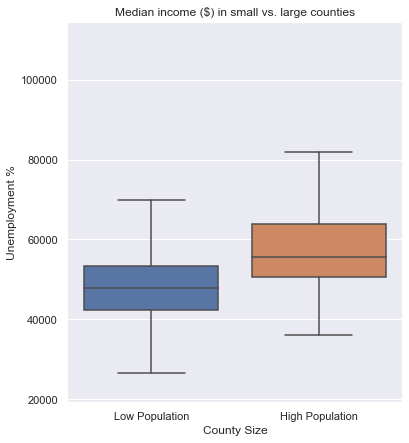

In [37]:
sns.set(rc={'figure.figsize':(6,7)})

# assign the plot to a variable
my_plt = sns.boxplot(data = df, x = 'population_group', y = 'median_household_income', fliersize=0)

# set labels
my_plt.set(xlabel='County Size', ylabel='Unemployment %', title='Median income ($) in small vs. large counties')

# Style!

This part is fun. We can change the look and feel of a plot by setting the style!

We can also change things like
* font
* palette (the color palette used)
* font size

We can do this by using `sns.set()` with a variety of arguments

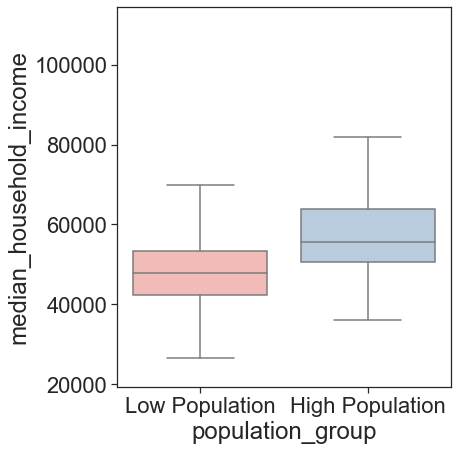

In [49]:
sns.set(style="ticks",font="Arial",palette="Pastel1",font_scale=2)
sns.boxplot(data = df, x = 'population_group', y = 'median_household_income', fliersize=0)

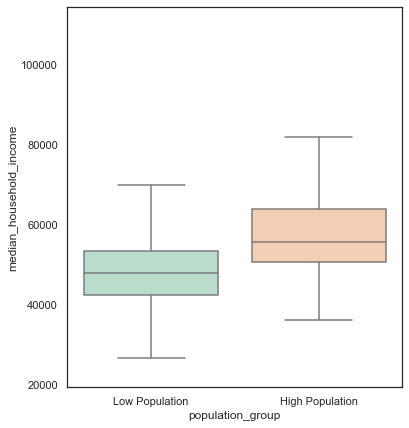

In [47]:
sns.set(style="white",palette="Pastel2",font_scale=1)
sns.boxplot(data = df, x = 'population_group', y = 'median_household_income', fliersize=0)

# Saving plots to files!

If we wanted to, we **could** take screenshots of our graphs, but these typically are low-resolution -- not great for presentations, websites, posters, etc. It is much better to save as images or pdf files!

Importantly, it helps to run the plot saving code **in the same cell** as when the plot was created
* We can save most seaborn plots using the `plt.savefig()` command with a file path to the eventual file inside

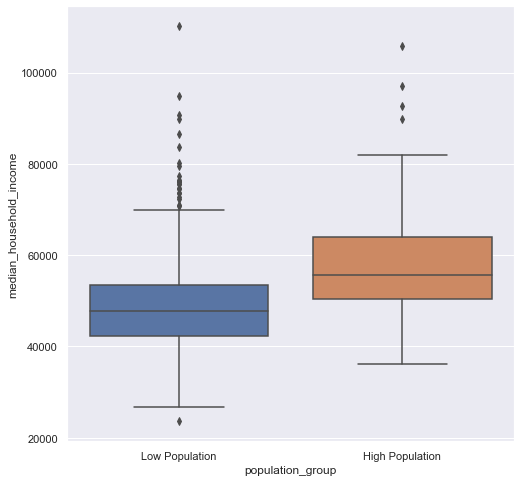

In [62]:
sns.set(rc={'figure.figsize':(8,8)})
sns.boxplot(data = df, x = 'population_group', y = 'median_household_income')

# save to png file
plt.savefig('my_plot_1.png')

# save to pdf file
plt.savefig('my_plot_1.pdf')

### Another example



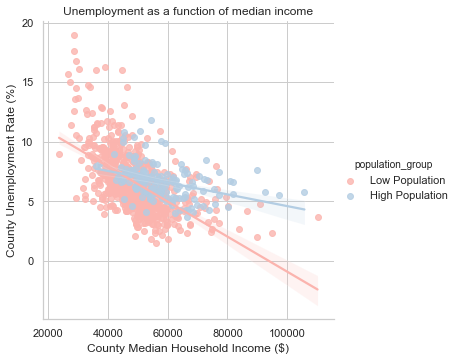

In [68]:
# set the plot size
sns.set(rc={'figure.figsize':(10,8)})

# set the style
sns.set(style="whitegrid",font="Arial",palette="Pastel1")

# make the lm plot
ax = sns.lmplot(data = df, x = 'median_household_income', y = 'unemployment_pct', hue = 'population_group')
ax.set(xlabel = 'County Median Household Income ($)', ylabel = 'County Unemployment Rate (%)', 
       title = 'Unemployment as a function of median income')

# save to png file
plt.savefig('my_plot_2.png')

# save to pdf file
plt.savefig('my_plot_2.pdf')

# Wrap-up

This lesson has had a LOT of content, but hopefully will be useful for your data science needs going forward! We learned how to make a lot of different plots, and how to customize them a lot.
* However, this is just the tip of the iceburg. There are a lot more kinds of graphs that you can make, and you can explore them through the [Seaborn gallery](https://seaborn.pydata.org/examples/index.html)
* Plotting is definitely not easy! Often, it can take many tries to get a graph to show up the way you want, or to make a point clearly. If you choose to work on more data science going forward, these will be valuable skills to practice.